<a href="https://colab.research.google.com/github/elimeyer1/ML_4105/blob/main/4105_Homework2_q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [725]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import random
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [726]:
file_path = '/content/drive/My Drive/4105/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [727]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def redefine(x):
    return x.map({'yes': 1, 'no': 0})

In [728]:
housing[varlist] = housing[varlist].apply(redefine)
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [729]:

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2310000,3180,2,1,1,1,0,0,0,0,0,0,unfurnished
53,7350000,5150,3,2,4,1,0,0,0,1,2,0,semi-furnished
350,3780000,3420,2,1,2,1,0,0,1,0,1,0,semi-furnished
79,6650000,6000,3,2,3,1,1,0,0,1,0,0,furnished


In [730]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.248485,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,semi-furnished
54,0.531987,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,semi-furnished
171,0.329966,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,semi-furnished
244,0.262626,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
268,0.246465,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,semi-furnished


In [731]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x_train = df_train[num_vars]
x_test = df_test[num_vars]
y_train = df_train.price
y_test = df_test.price


In [732]:
learning_rate = 0.04
n_iterations = 500
m = len(x_train)
m

436

In [733]:
theta = np.zeros((6))
theta

array([0., 0., 0., 0., 0., 0.])

In [734]:
X_b_train = np.c_[np.ones((len(x_train),1)), x_train]
X_b_val = np.c_[np.ones((len(x_test),1)), x_test]

train_losses = []
val_losses = []

In [735]:
def loss(X_b_train, X_b_val, theta, n_iterations, train_losses, val_losses, learning_rate):

    for iteration in range(n_iterations):
      gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
      theta -= learning_rate * gradients

      train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
      val_loss = (1/len(x_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

      train_losses.append(train_loss)
      val_losses.append(val_loss)

    return(train_losses, val_losses)

In [736]:
[train_losses,val_losses]=loss(X_b_train, X_b_val, theta, n_iterations, train_losses, val_losses, learning_rate)


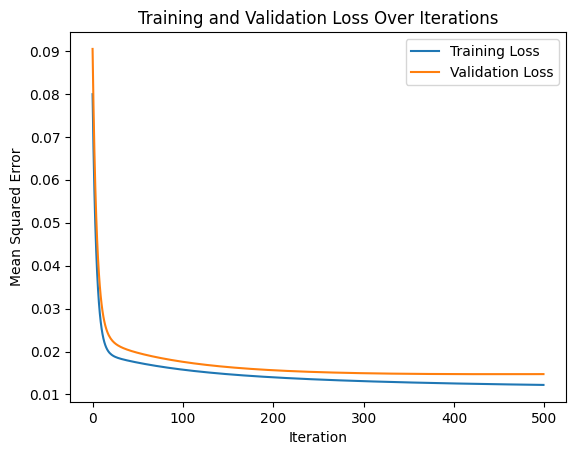

In [737]:
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()


In [738]:
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

x_norm_train = normalize(x_train)
x_norm_test = normalize(x_test)

In [739]:
learning_rate_norm = 0.04
n_iterations_norm = 500
m = len(x_train)

In [740]:
theta_norm = np.zeros((6))
theta_norm

array([0., 0., 0., 0., 0., 0.])

In [741]:
X_b_norm_train = np.c_[np.ones((len(x_norm_train),1)), x_train]
X_b_norm_val = np.c_[np.ones((len(x_norm_test),1)), x_test]

train_norm_losses = []
val_norm_losses = []

In [742]:
[train_norm_losses,val_norm_losses]=loss(X_b_norm_train, X_b_norm_val, theta_norm, n_iterations_norm, train_norm_losses, val_norm_losses, learning_rate_norm)

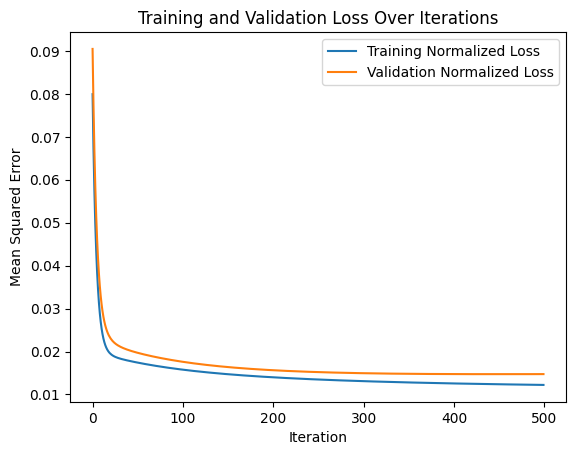

In [743]:
plt.plot(train_norm_losses, label="Training Normalized Loss")
plt.plot(val_norm_losses, label="Validation Normalized Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()


In [744]:
x_std_train = (x_train - x_train.mean()) / x_train.std()
x_std_test = (x_test - x_test.mean()) / x_test.std()

In [745]:
learning_rate_std = 0.04
n_iterations_std = 500
m = len(x_std_train)

In [746]:
theta_std= np.zeros((6))
theta_std

array([0., 0., 0., 0., 0., 0.])

In [747]:
X_b_std_train = np.c_[np.ones((len(x_std_train),1)), x_train]
X_b_std_val = np.c_[np.ones((len(x_std_test),1)), x_test]

train_std_losses = []
val_std_losses = []

In [748]:
[train_std_losses,val_std_losses]=loss(X_b_std_train, X_b_std_val, theta_std, n_iterations_std, train_std_losses, val_std_losses, learning_rate_std)

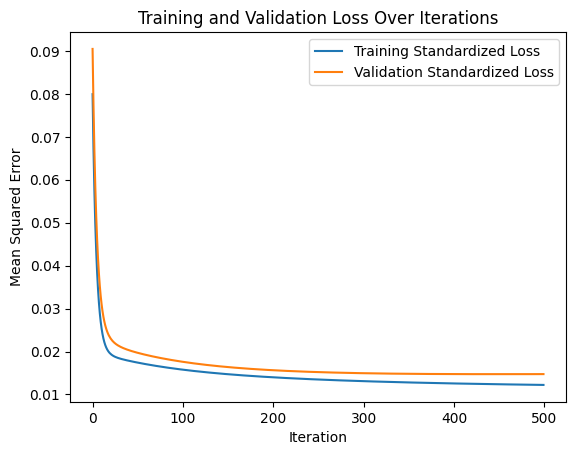

In [749]:
plt.plot(train_std_losses, label="Training Standardized Loss")
plt.plot(val_std_losses, label="Validation Standardized Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [750]:
lamb=random.randint(1,10)
lamb

7

In [751]:
X_b_norm_p_train = X_b_norm_train
X_b_norm_p_val = X_b_norm_val

train_norm_p_losses = []
val_norm_p_losses = []

In [752]:
learning_rate_norm_p = 0.04
n_iterations_norm_p = 500
m = len(x_std_train)

In [753]:
theta_norm_p= np.zeros((6))
theta_norm_p

array([0., 0., 0., 0., 0., 0.])

In [754]:
def loss_p(X_b_train, X_b_val, theta, n_iterations, train_losses, val_losses, learning_rate, lamb):

  for iteration in range(n_iterations):
      gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
      theta = theta*(1-learning_rate*(lamb/m)) - learning_rate * gradients

      train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
      val_loss = (1/len(x_test)) * np.sum(np.square(X_b_val.dot(theta) - y_test))

      train_losses.append(train_loss)
      val_losses.append(val_loss)

  return train_losses, val_losses


In [755]:
[train_norm_p_losses,val_norm_p_lossess]=loss_p(X_b_norm_p_train, X_b_norm_p_val, theta_norm_p, n_iterations_norm_p, train_norm_p_losses, val_norm_p_losses, learning_rate_norm_p, lamb)

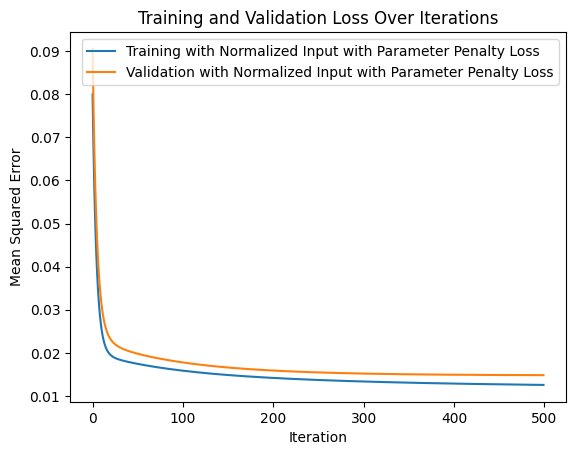

In [756]:
plt.plot(train_norm_p_losses, label="Training with Normalized Input with Parameter Penalty Loss")
plt.plot(val_norm_p_lossess, label="Validation with Normalized Input with Parameter Penalty Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [757]:
X_b_std_p_train = X_b_std_train
X_b_std_p_val = X_b_std_val

train_std_p_losses = []
val_std_p_losses = []

In [758]:
learning_rate_std_p = 0.04
n_iterations_std_p = 500
m = len(x_std_train)

In [759]:
theta_std_p= np.zeros((6))
theta_std_p

array([0., 0., 0., 0., 0., 0.])

In [760]:
[train_std_p_losses,val_std_p_lossess]=loss_p(X_b_std_p_train, X_b_std_p_val, theta_std_p, n_iterations_std_p, train_std_p_losses, val_std_p_losses, learning_rate_std_p, lamb)


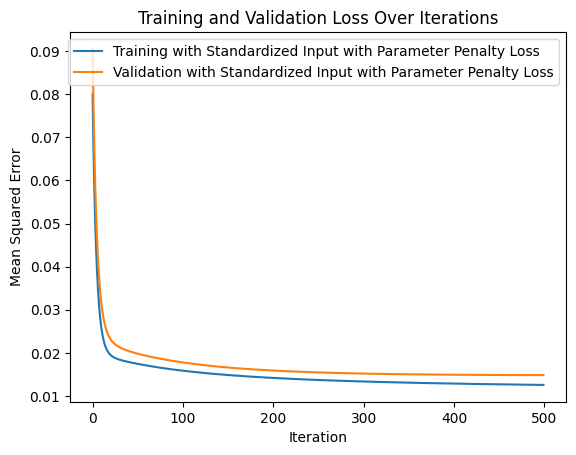

In [761]:
plt.plot(train_std_p_losses, label="Training with Standardized Input with Parameter Penalty Loss")
plt.plot(val_std_p_lossess, label="Validation with Standardized Input with Parameter Penalty Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()